<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# !apt-get -qq install python-cartopy python3-cartopy

In [23]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [24]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [25]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-30 14:25:16.497768


In [26]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [27]:
# All States
states = pop['State'].tolist()
states.sort()

In [28]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [29]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [30]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

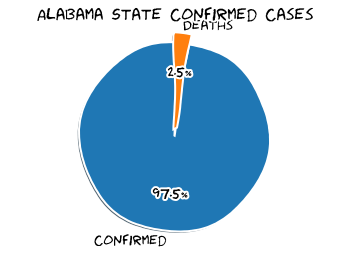

Alabama State Total Population
4887871
Alabama State Confirmed
37175 (0.7605560785053452% of population)
Alabama State Deaths
929 (2.498991257565568% of confirmed)



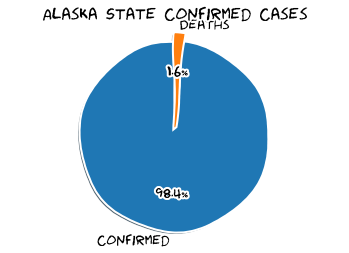

Alaska State Total Population
737438
Alaska State Confirmed
901 (0.12217976290888183% of population)
Alaska State Deaths
14 (1.553829078801332% of confirmed)



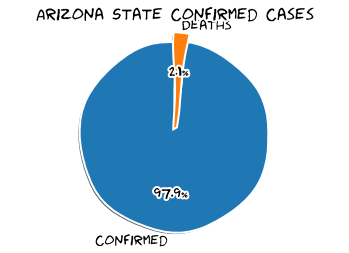

Arizona State Total Population
7171646
Arizona State Confirmed
74545 (1.0394405970400658% of population)
Arizona State Deaths
1597 (2.1423301361593667% of confirmed)



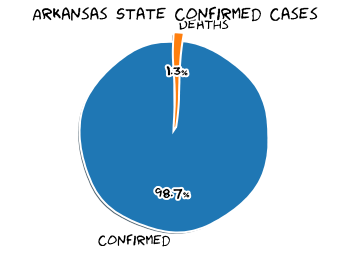

Arkansas State Total Population
3013825
Arkansas State Confirmed
20257 (0.672135907028444% of population)
Arkansas State Deaths
265 (1.3081897615639038% of confirmed)



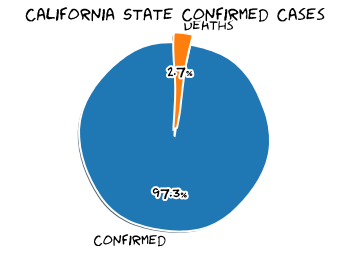

California State Total Population
39557045
California State Confirmed
223646 (0.5653759020675079% of population)
California State Deaths
5983 (2.675209929978627% of confirmed)



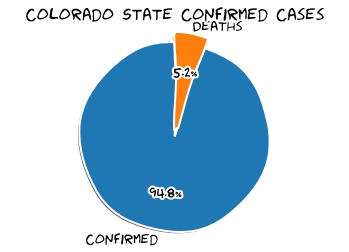

Colorado State Total Population
5695564
Colorado State Confirmed
32494 (0.5705141755934969% of population)
Colorado State Deaths
1681 (5.173262756201145% of confirmed)



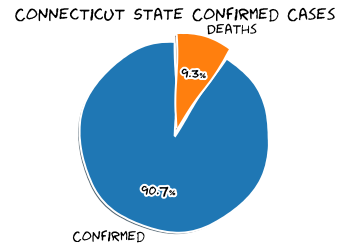

Connecticut State Total Population
3572665
Connecticut State Confirmed
46362 (1.2976867408503177% of population)
Connecticut State Deaths
4320 (9.317975928562184% of confirmed)



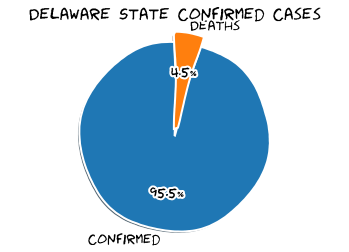

Delaware State Total Population
967171
Delaware State Confirmed
11376 (1.1762139270098049% of population)
Delaware State Deaths
507 (4.456751054852321% of confirmed)



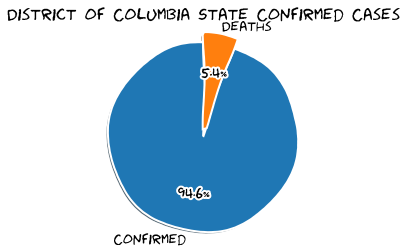

District of Columbia State Total Population
702455
District of Columbia State Confirmed
10292 (1.465147233630624% of population)
District of Columbia State Deaths
551 (5.353672755538282% of confirmed)



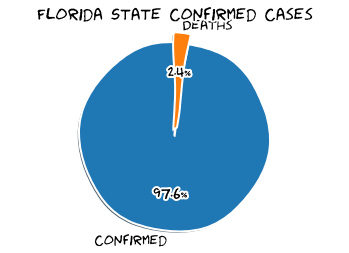

Florida State Total Population
21299325
Florida State Confirmed
146341 (0.6870687216613671% of population)
Florida State Deaths
3447 (2.35545745894862% of confirmed)



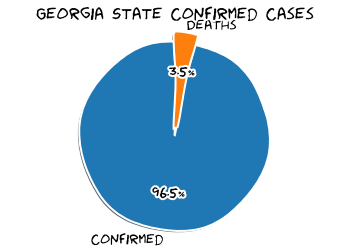

Georgia State Total Population
10519475
Georgia State Confirmed
79417 (0.7549521245119172% of population)
Georgia State Deaths
2784 (3.505546671367591% of confirmed)



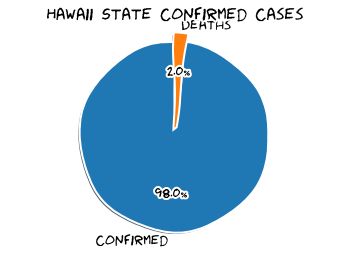

Hawaii State Total Population
1420491
Hawaii State Confirmed
900 (0.06335837397069041% of population)
Hawaii State Deaths
18 (2.0% of confirmed)



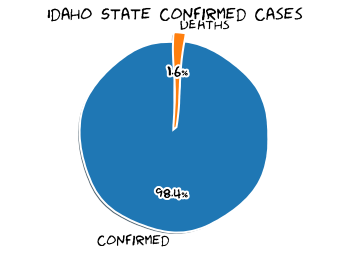

Idaho State Total Population
1754208
Idaho State Confirmed
5752 (0.32789726189824697% of population)
Idaho State Deaths
91 (1.582058414464534% of confirmed)



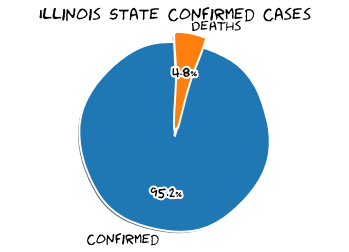

Illinois State Total Population
12741080
Illinois State Confirmed
142461 (1.1181234243878855% of population)
Illinois State Deaths
6902 (4.8448347266971306% of confirmed)



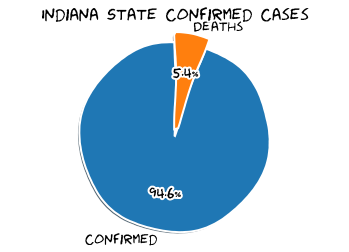

Indiana State Total Population
6691878
Indiana State Confirmed
45228 (0.6758640847905476% of population)
Indiana State Deaths
2432 (5.377199964623684% of confirmed)



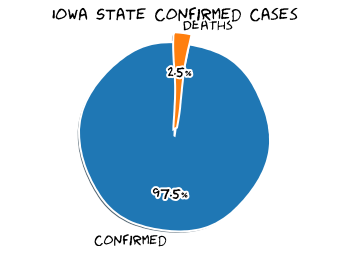

Iowa State Total Population
3156145
Iowa State Confirmed
28874 (0.9148502366019304% of population)
Iowa State Deaths
712 (2.4658862644593755% of confirmed)



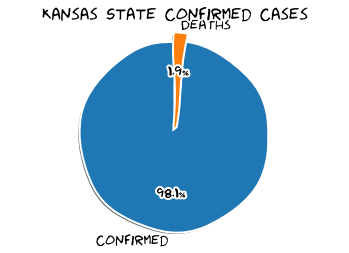

Kansas State Total Population
2911510
Kansas State Confirmed
14209 (0.48802854875992185% of population)
Kansas State Deaths
272 (1.9142796818917587% of confirmed)



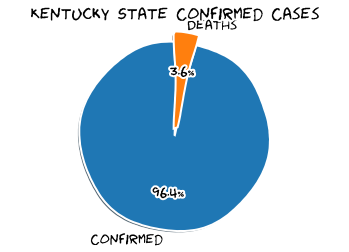

Kentucky State Total Population
4468402
Kentucky State Confirmed
15347 (0.3434561169742561% of population)
Kentucky State Deaths
560 (3.648921613344627% of confirmed)



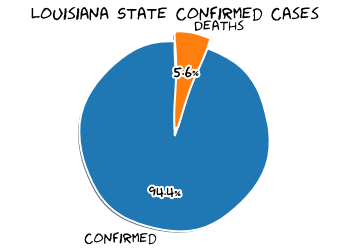

Louisiana State Total Population
4659978
Louisiana State Confirmed
57081 (1.224919945973994% of population)
Louisiana State Deaths
3199 (5.604316672798304% of confirmed)



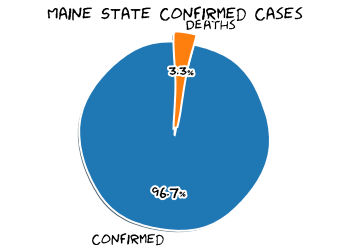

Maine State Total Population
1338404
Maine State Confirmed
3219 (0.2405103391800981% of population)
Maine State Deaths
105 (3.2618825722273996% of confirmed)



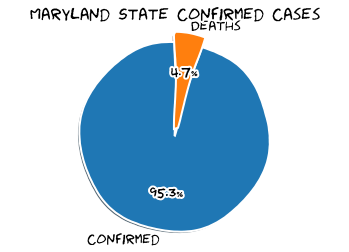

Maryland State Total Population
6042718
Maryland State Confirmed
67254 (1.112975982000153% of population)
Maryland State Deaths
3151 (4.685223183751153% of confirmed)



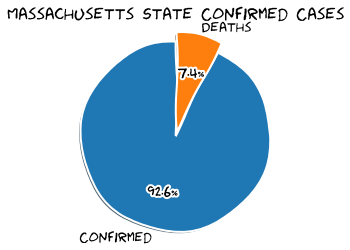

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
108768 (1.5758570265579603% of population)
Massachusetts State Deaths
8094 (7.441526919682259% of confirmed)



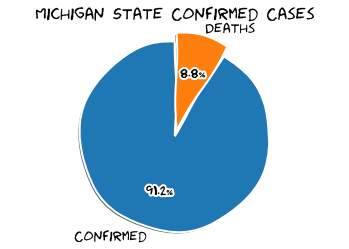

Michigan State Total Population
9995915
Michigan State Confirmed
70223 (0.7025169781855888% of population)
Michigan State Deaths
6161 (8.773478774760406% of confirmed)



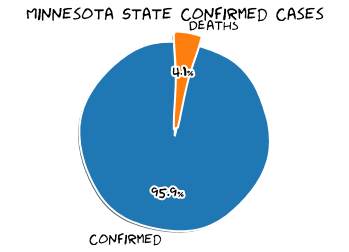

Minnesota State Total Population
5611179
Minnesota State Confirmed
35861 (0.6390991982255423% of population)
Minnesota State Deaths
1470 (4.0991606480577785% of confirmed)



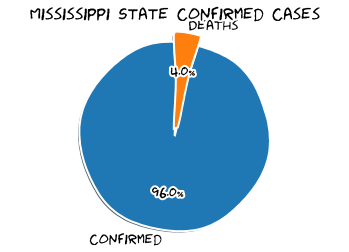

Mississippi State Total Population
2986530
Mississippi State Confirmed
26567 (0.8895607946345758% of population)
Mississippi State Deaths
1059 (3.98614822900591% of confirmed)



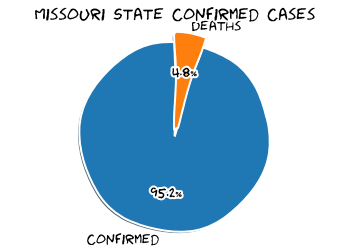

Missouri State Total Population
6126452
Missouri State Confirmed
20825 (0.33991941828647315% of population)
Missouri State Deaths
1004 (4.821128451380552% of confirmed)



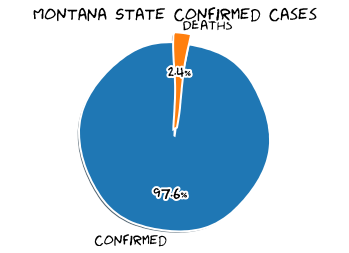

Montana State Total Population
1062305
Montana State Confirmed
919 (0.08650999477551173% of population)
Montana State Deaths
22 (2.3939064200217626% of confirmed)



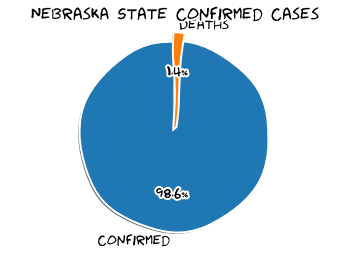

Nebraska State Total Population
1929268
Nebraska State Confirmed
19042 (0.9870064708480107% of population)
Nebraska State Deaths
269 (1.4126667366873227% of confirmed)



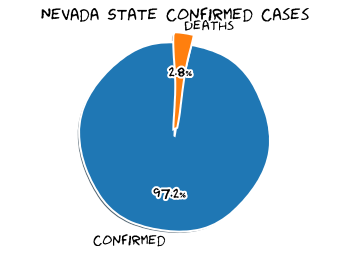

Nevada State Total Population
3034392
Nevada State Confirmed
17894 (0.5897062739421933% of population)
Nevada State Deaths
504 (2.816586565329161% of confirmed)



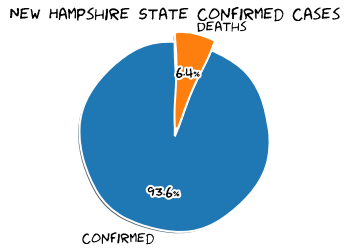

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5760 (0.4246353370321823% of population)
New Hampshire State Deaths
367 (6.371527777777778% of confirmed)



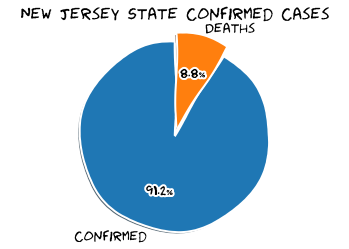

New Jersey State Total Population
8908520
New Jersey State Confirmed
171272 (1.9225640173676437% of population)
New Jersey State Deaths
14992 (8.75332803960951% of confirmed)



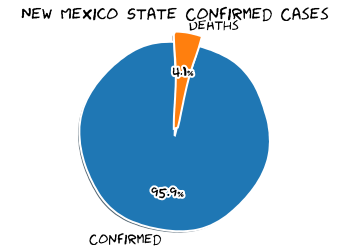

New Mexico State Total Population
2095428
New Mexico State Confirmed
11982 (0.5718163544631455% of population)
New Mexico State Deaths
493 (4.1145050909697884% of confirmed)



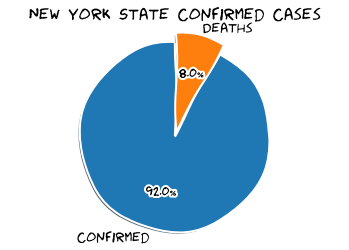

New York State Total Population
19542209
New York State Confirmed
393304 (2.012587215703199% of population)
New York State Deaths
31403 (7.984409006773387% of confirmed)



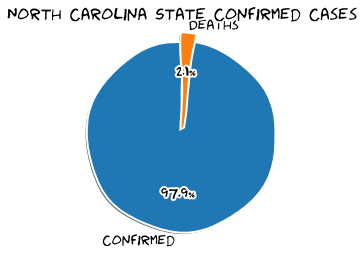

North Carolina State Total Population
10383620
North Carolina State Confirmed
63736 (0.6138129091781094% of population)
North Carolina State Deaths
1357 (2.129095016944898% of confirmed)



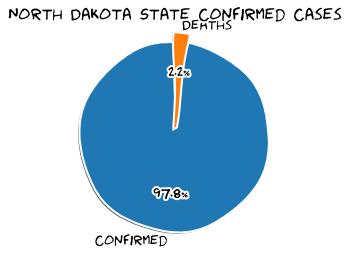

North Dakota State Total Population
760077
North Dakota State Confirmed
3539 (0.4656107210190547% of population)
North Dakota State Deaths
79 (2.2322690025430916% of confirmed)



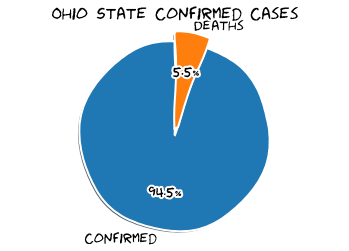

Ohio State Total Population
11689442
Ohio State Confirmed
102093 (0.8733778738112563% of population)
Ohio State Deaths
5636 (5.520456838372856% of confirmed)



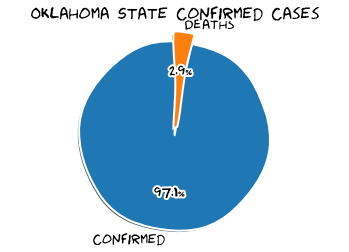

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
13175 (0.33412974987313215% of population)
Oklahoma State Deaths
385 (2.922201138519924% of confirmed)



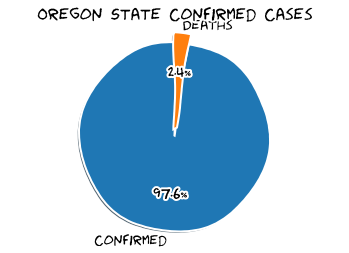

Oregon State Total Population
4190713
Oregon State Confirmed
8485 (0.20247151260417975% of population)
Oregon State Deaths
204 (2.404242781378904% of confirmed)



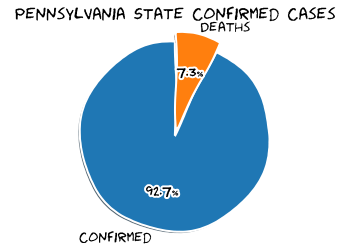

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
90467 (0.7063838226728071% of population)
Pennsylvania State Deaths
6614 (7.310953165242575% of confirmed)



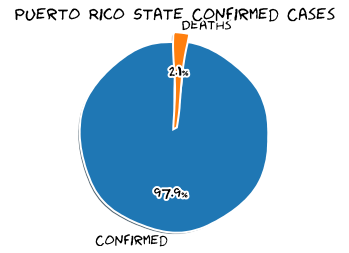

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
7250 (0.2269061919726536% of population)
Puerto Rico State Deaths
153 (2.110344827586207% of confirmed)



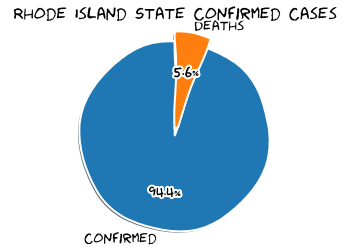

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
16764 (1.585525600223207% of population)
Rhode Island State Deaths
946 (5.6430446194225725% of confirmed)



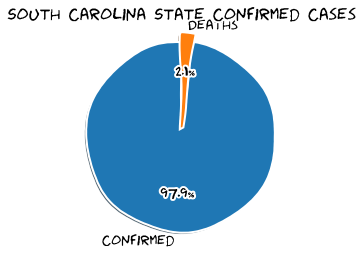

South Carolina State Total Population
5084127
South Carolina State Confirmed
34644 (0.681414921381783% of population)
South Carolina State Deaths
720 (2.0782819535850363% of confirmed)



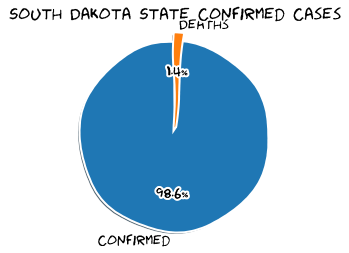

South Dakota State Total Population
882235
South Dakota State Confirmed
6716 (0.7612484202055009% of population)
South Dakota State Deaths
91 (1.3549731983323405% of confirmed)



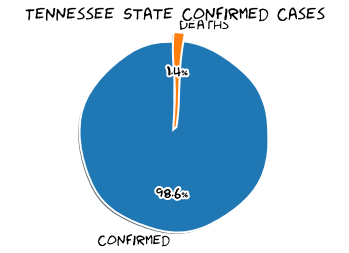

Tennessee State Total Population
6770010
Tennessee State Confirmed
83566 (1.234355636106889% of population)
Tennessee State Deaths
1177 (1.4084675585764546% of confirmed)



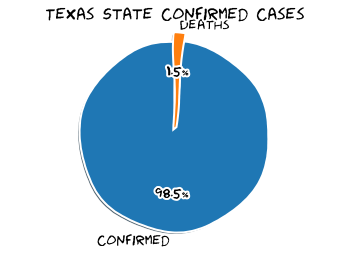

Texas State Total Population
28701845
Texas State Confirmed
156706 (0.5459788386426029% of population)
Texas State Deaths
2416 (1.5417405842788408% of confirmed)



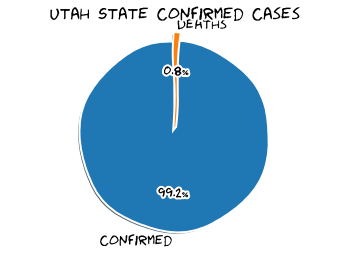

Utah State Total Population
3161105
Utah State Confirmed
21664 (0.685329971639664% of population)
Utah State Deaths
168 (0.775480059084195% of confirmed)



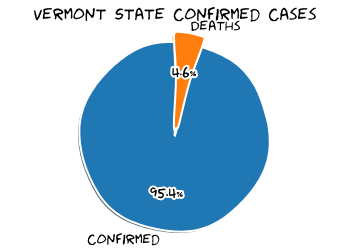

Vermont State Total Population
626299
Vermont State Confirmed
1208 (0.19287912003691526% of population)
Vermont State Deaths
56 (4.635761589403973% of confirmed)



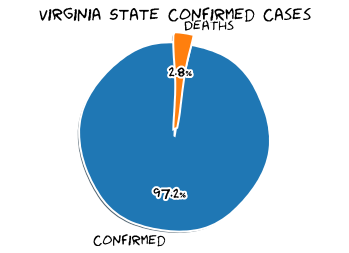

Virginia State Total Population
8517685
Virginia State Confirmed
62189 (0.7301162228938967% of population)
Virginia State Deaths
1740 (2.797922462171767% of confirmed)



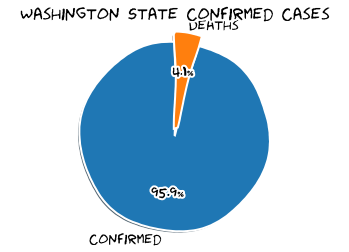

Washington State Total Population
7535591
Washington State Confirmed
32253 (0.42800889804130826% of population)
Washington State Deaths
1320 (4.0926425448795465% of confirmed)



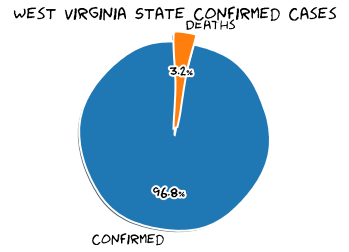

West Virginia State Total Population
1805832
West Virginia State Confirmed
2870 (0.15892951282289824% of population)
West Virginia State Deaths
93 (3.2404181184668994% of confirmed)



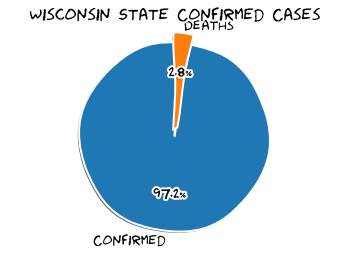

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
28058 (0.4826296002730165% of population)
Wisconsin State Deaths
777 (2.7692636681160456% of confirmed)



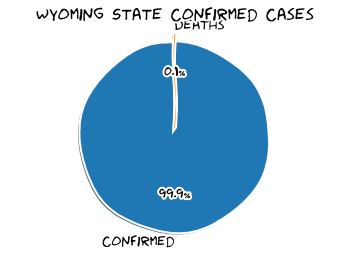

Wyoming State Total Population
577737
Wyoming State Confirmed
1450 (0.250979251804887% of population)
Wyoming State Deaths
1 (0.06896551724137931% of confirmed)



In [31]:
for i in states:
    state_details(i)

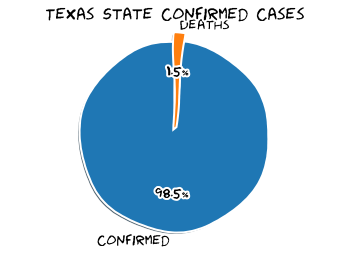

Texas State Total Population
28701845
Texas State Confirmed
156706 (0.5459788386426029% of population)
Texas State Deaths
2416 (1.5417405842788408% of confirmed)



In [32]:
state_details('Texas')

In [33]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
2682897
US Deaths
129307

New York City Confirmed
214750
New York City Deaths
22470

Philippines Confirmed
37514
Philippines Deaths
1266



In [34]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 10424992},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 509706},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-30T13:33:53.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 5262705},
 'source': 'https://github.com/mathdroid/covid19'}

In [35]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [36]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-30 04:33:48,34.22333378,-82.46170658,106,0,0,106.0,"Abbeville, South Carolina, US",432.17678476780685,0.0
1,22001,Acadia,Louisiana,US,2020-06-30 04:33:48,30.295064899999996,-92.41419698,850,37,0,813.0,"Acadia, Louisiana, US",1369.9734063985816,4.352941176
2,51001,Accomack,Virginia,US,2020-06-30 04:33:48,37.76707161,-75.63234615,1039,14,0,1025.0,"Accomack, Virginia, US",3215.1256343606883,1.347449471
3,16001,Ada,Idaho,US,2020-06-30 04:33:48,43.4526575,-116.24155159999998,2040,23,0,2017.0,"Ada, Idaho, US",423.5994742382997,1.12745098
4,19001,Adair,Iowa,US,2020-06-30 04:33:48,41.33075609,-94.47105874,15,0,0,15.0,"Adair, Iowa, US",209.7315436241611,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,,,,West Bank and Gaza,2020-06-30 04:33:48,31.9522,35.2332,2185,5,447,1733,West Bank and Gaza,42.83124528562266,0.2288329519
3781,,,,Western Sahara,2020-06-30 04:33:48,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3782,,,,Yemen,2020-06-30 04:33:48,15.552727,48.516388,1128,304,432,392,Yemen,3.781939281903608,26.95035461
3783,,,,Zambia,2020-06-30 04:33:48,-13.133897,27.849332,1568,22,1311,235,Zambia,8.529176201248523,1.403061224


In [37]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593444832000,40.767273,-73.971526,214750,0,22470,192280,New York City,36061,"New York City, New York, US",2575.923161,None,None,84036061,USA
1,California,US,1593520430000,34.308284,-118.228241,100958,0,3331,97627,Los Angeles,06037,"Los Angeles, California, US",1005.647215,None,None,84006037,USA
2,Illinois,US,1593520430000,41.841448,-87.816588,90122,0,4554,85568,Cook,17031,"Cook, Illinois, US",1749.862579,None,None,84017031,USA
3,Arizona,US,1593520430000,33.348359,-112.491815,45178,0,746,44432,Maricopa,04013,"Maricopa, Arizona, US",1007.220292,None,None,84004013,USA
4,New York,US,1593520430000,40.740665,-73.589419,41780,0,2182,39598,Nassau,36059,"Nassau, New York, US",3079.022849,None,None,84036059,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,Ohio,US,1593520430000,NaN,NaN,1,0,0,1,Unassigned,90039,"Unassigned, Ohio, US",NaN,None,None,84090039,USA
3056,Kansas,US,1593520430000,39.784208,-97.087532,1,0,0,1,Washington,20201,"Washington, Kansas, US",18.497965,None,None,84020201,USA
3057,West Virginia,US,1593520430000,38.493709,-80.420202,1,0,0,1,Webster,54101,"Webster, West Virginia, US",12.324378,None,None,84054101,USA
3058,Montana,US,1593520430000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA


In [38]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593444832000,40.767273,-73.971526,214750,0,22470,192280,New York City,36061,"New York City, New York, US",2575.923161,None,None,84036061,USA
4,New York,US,1593520430000,40.740665,-73.589419,41780,0,2182,39598,Nassau,36059,"Nassau, New York, US",3079.022849,None,None,84036059,USA
5,New York,US,1593520430000,40.883201,-72.801217,41339,0,1979,39360,Suffolk,36103,"Suffolk, New York, US",2799.605310,None,None,84036103,USA
7,New York,US,1593520430000,41.162784,-73.757417,34798,0,1424,33374,Westchester,36119,"Westchester, New York, US",3596.670202,None,None,84036119,USA
33,New York,US,1593520430000,41.150279,-74.025605,13580,0,667,12913,Rockland,36087,"Rockland, New York, US",4168.342086,None,None,84036087,USA
49,New York,US,1593520430000,41.403375,-74.302408,10744,0,478,10266,Orange,36071,"Orange, New York, US",2791.084325,None,None,84036071,USA
75,New York,US,1593520430000,42.762490,-78.730637,7249,0,634,6615,Erie,36029,"Erie, New York, US",789.048026,None,None,84036029,USA
121,New York,US,1593520430000,41.764861,-73.743567,4201,0,151,4050,Dutchess,36027,"Dutchess, New York, US",1427.852817,None,None,84036027,USA
133,New York,US,1593520430000,43.146389,-77.693229,3709,0,266,3443,Monroe,36055,"Monroe, New York, US",500.020222,None,None,84036055,USA
174,New York,US,1593520430000,43.004919,-76.199712,2822,0,184,2638,Onondaga,36067,"Onondaga, New York, US",612.774902,None,None,84036067,USA


In [39]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

393304

In [40]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593444832000,40.767273,-73.971526,214750,0,22470,192280,New York City,36061,"New York City, New York, US",2575.923161,None,None,84036061,USA


In [41]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
57,None,Philippines,1593524033000,12.879721,121.774017,37514,10233,1266,26015.0,None,None,Philippines,34.23401,None,None,608,PHL,PH


In [42]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
